In [1]:
import pandas as pd
import numpy as np
import scipy

In [2]:
dfs = [
    pd.read_table("core-music-16k.txt", names=["frequency", "core_music"], header=0, index_col=0),
    pd.read_table("core-samples-16k.txt", names=["frequency", "core_samples"], header=0, index_col=0),
    pd.read_table("m72-music-16k.txt", names=["frequency", "m72_music"], header=0, index_col=0),
    pd.read_table("m72-samples-16k.txt", names=["frequency", "m72_samples"], header=0, index_col=0)
]

spec = dfs[0].join(dfs[1:])
spec = spec[spec.index < 24000]

<AxesSubplot:xlabel='frequency'>

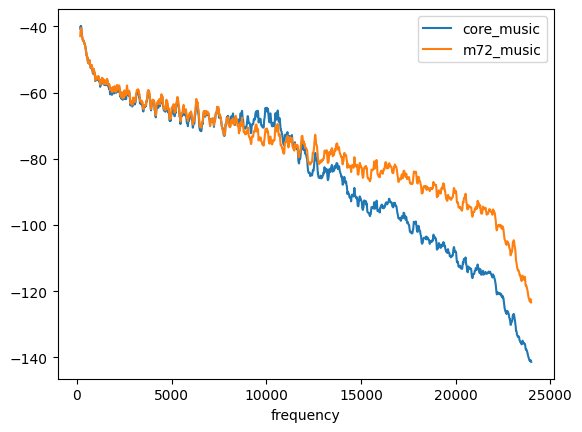

In [3]:
spec[["core_music", "m72_music"]].rolling(30).mean().plot(logx=False)

<AxesSubplot:xlabel='frequency'>

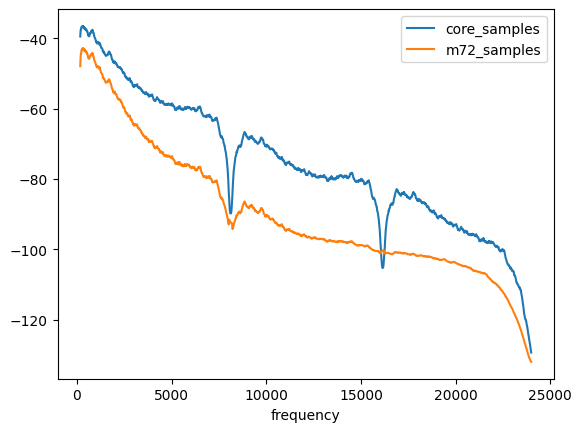

In [4]:
spec[["core_samples", "m72_samples"]].rolling(30).mean().plot(logx=False)

<AxesSubplot:title={'center':'Samples Delta'}, xlabel='frequency'>

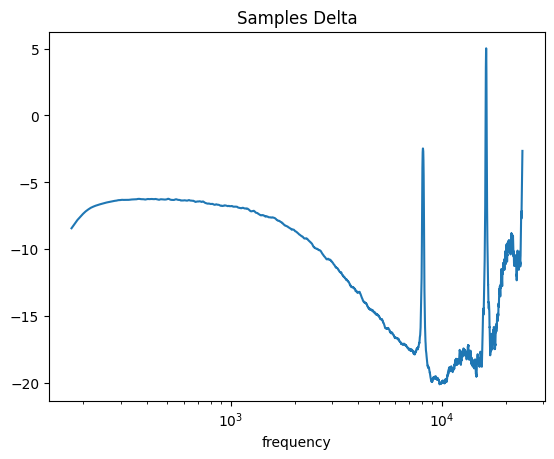

In [5]:
sma_core = spec["core_samples"].rolling(30).mean()
sma_m72 = spec["m72_samples"].rolling(30).mean()
(sma_m72 - sma_core).plot(logx=True, title="Samples Delta")

<AxesSubplot:title={'center':'Music Delta'}, xlabel='frequency'>

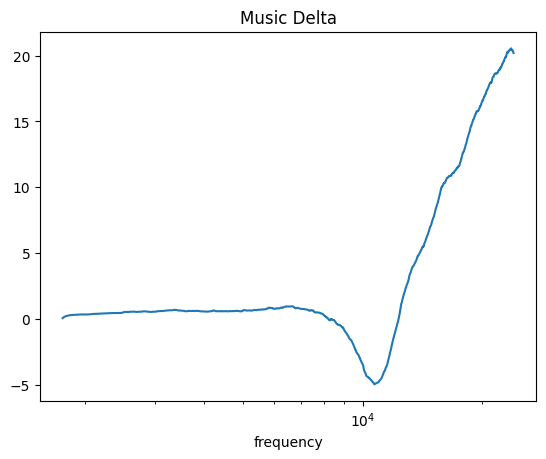

In [6]:
sma_core = spec["core_music"].rolling(300).mean()
sma_m72 = spec["m72_music"].rolling(300).mean()
(sma_m72 - sma_core).plot(logx=True, title="Music Delta")